In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def rastringing(x):
    n=len(x)
    return 10*n+sum([xi**2-10*np.cos(2*np.pi*xi)for xi in x])

In [10]:
dim=2;num_particles=30;max_iter=100;w=1;c1=1;c2=2;



In [11]:
particles=np.random.uniform(-5.12,5.12,(num_particles,dim))
velocities=np.zeros((num_particles, dim))

In [12]:
best_positions=np.copy(particles)
best_fitness=np.array([rastringing(p) for  p in particles])
g_best_position=best_positions[np.argmin(best_fitness)]
g_best_fitness=np.min(best_fitness)

In [17]:
for i in range(max_iter):
    r1=np.random.uniform(0 , 1,(num_particles , dim))
    r2=np.random.uniform(0 , 1,(num_particles , dim))
    velocities=w*velocities+c1*r1*(best_positions - particles)+c2*r2*(g_best_position-particles)
    w=0.95*w
    particles+=velocities
    fitness_value=np.array([rastringing(p) for  p in particles])

    improved_id=np.where(fitness_value<best_fitness)
    best_positions[improved_id]=particles[improved_id]
    best_fitness[improved_id]=fitness_value[improved_id]
    if np.min(fitness_value)<g_best_fitness:
        g_best_fitness = np.min(fitness_value)
        g_best_position= particles[np.argmin(fitness_value)]

print(g_best_fitness)
print(g_best_position)

0.0
[ 3.15982430e-09 -4.00994301e-10]


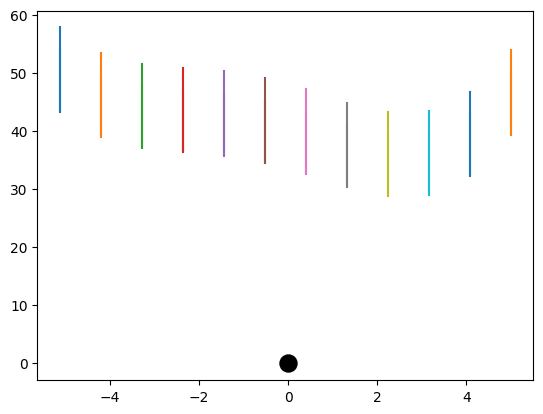

In [26]:
x=np.linspace(-5.12 , 5,12 , 100)
y=np.linspace(-5.12 , 5,12 , 100)
X , Y =np.meshgrid(x , y)
Z=rastringing([X , Y])

plt.plot(X , Z)
plt.scatter(g_best_position[0],g_best_fitness, c='black' , s=150)
plt.show()

